# **Insight Data Engineering - Coding Challenge**




![Logo](http://www.southernfriedscience.com/wp-content/uploads/2011/12/logo_twitter_withbird_1000_allblue.png)

In [253]:
Version = '1.0.0'

### ** Read and parse the initial dataset **
#### This is a raw twitter feed twetted by The Prime Minister of India. <br>The raw data is currently stored in text file.  We will start by storing this raw data in as an RDD, with each element of the RDD representing a data point.

In [17]:
import os.path
baseDir = os.path.join('InsightDataEngineering')
inputPath = os.path.join('tweet_input', 'tweets.txt')
outputPath1 = os.path.join('tweet_output', 'ft1 ')
outputPath2 = os.path.join('tweet_output', 'ft2 ')
fileName = os.path.join(baseDir, inputPath)
fileOutput1= os.path.join(baseDir, outputPath1)
fileOutput2= os.path.join(baseDir, outputPath2)
numPartitions = 2
rawData = sc.textFile(fileName, numPartitions)

In [18]:
numPoints = rawData.count()
print "Total Rows : " + str(numPoints)
print '\n{0}'.format(rawData.take(2))

Total Rows : 3398

[u'More good news from @Wimbledon. Congrats again @mhingis. @Leander your accomplishments are truly inspiring &amp; they make us very proud.', u"I seek to take India's ties with Tajikistan to newer heights through this visit &amp; expand the scale of cooperation. http://t.co/PYsGvoleLv"]


#### ** Data Pre-Processing Standards**
1. LowerCase the tokens
2. Ignore Non Ascii characters

In [19]:
def simpleRules(tokenlist):
    """ A simple implementation of input string tokenization
    Args:
        string (str): input string
    Returns:
        list: a list of tokens
    """
    rule = [c.lower().encode('ascii',errors='ignore') for c in tokenlist]
    nonEmpty = [x for x in rule if len(x) > 0 ]
    return nonEmpty

tokenRDD = rawData.map(lambda x : x.split(' '))
rulesRDD = tokenRDD.map(lambda x : simpleRules(x))
rulesRDDCache = rulesRDD.cache()


#### ** Feature 1 : Calculate the total number of times each word has been tweeted **
1. Counting the token Frequencies
2. Top 20 


In [21]:
bagOfWords = rulesRDDCache.flatMap(lambda x : x)
wordCount = bagOfWords.map(lambda x : (x,1)).reduceByKey(lambda a,b : (a+b))
#wordCount.saveAsTextFile(fileOutput1);
sortedRDD = wordCount.takeOrdered(20, lambda (key, value): -1 * (value))
print "Top 20 words in Corpus : " + str(sortedRDD)

Top 20 words in Corpus : [('the', 2202), ('to', 1621), ('of', 1597), ('&amp;', 1252), ('a', 1066), ('in', 873), ('for', 578), ('on', 544), ('i', 525), ('with', 515), ('is', 507), ('my', 464), ('our', 405), ('rt', 358), ('at', 348), ('will', 329), ('"rt', 285), ('we', 259), ('his', 253), ('@narendramodi', 250)]



#### ** Feature 2 : Calculate the median number of unique words per tweet, Median **
#### ** TO DO **
1. Implemnt a windowing funtion lag 
2. Calculate average


In [32]:
#print rulesRDDCache.take(1)
print sortedRDD[1][0]
#medianRDD.saveAsTextFile(fileOutput2);

to


TypeError: cannot perform reduce with flexible type

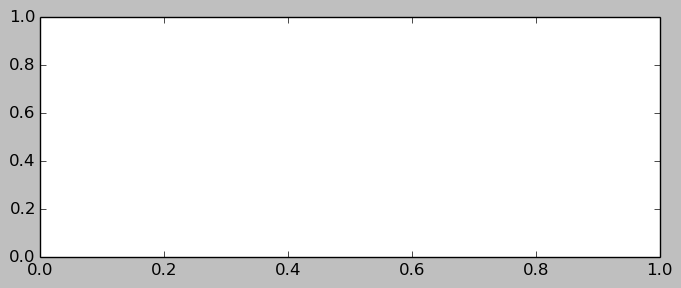

In [34]:
import matplotlib.pyplot as plt

values = wordCount.collect()
fig = plt.figure(figsize=(8,3))
plt.hist(values, 50, log=True)
pass